In [1]:
from clip import clip_pic
from matplotlib import pyplot as plt

In [2]:
path = r'/disk2/zhanglingming/trashcls/data/监控识别测试文件/玻璃瓶/192.168.1.249_14_20230628151350179.jpg'
import cv2
pic = cv2.imread(path)
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)

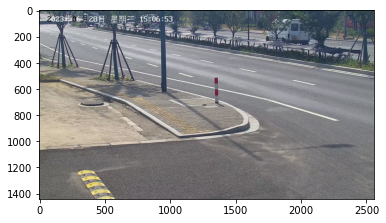

(1440, 2560, 3)


In [3]:
#展示pic以及pic的尺寸
plt.imshow(pic)
plt.show()
print(pic.shape)


In [7]:
pic_list = clip_pic(pic,4,0)

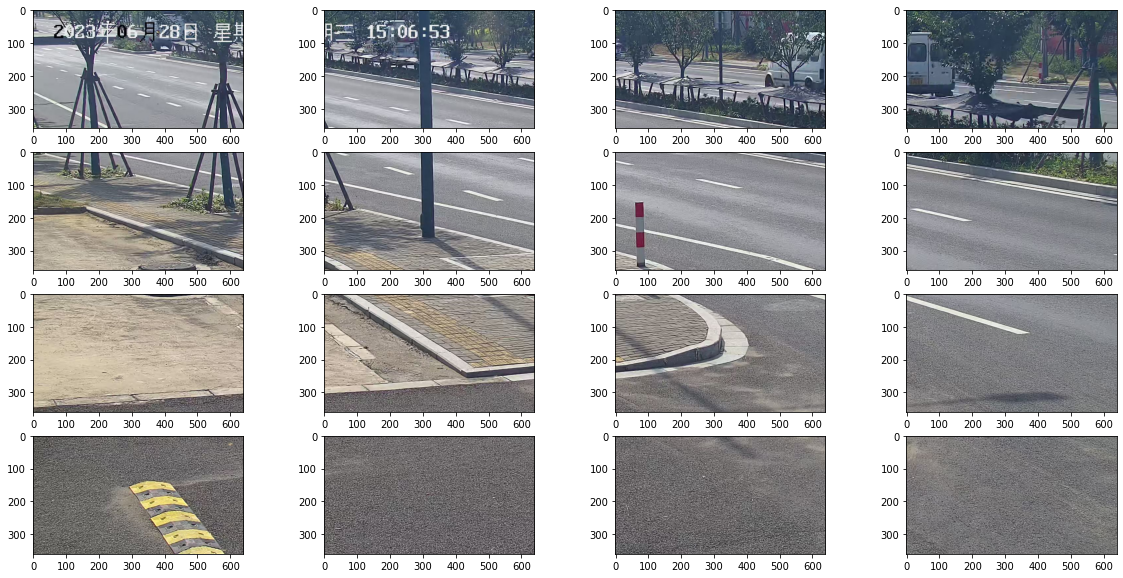

In [8]:

#讲list中的图片用网格的形式显示出来
plt.figure(figsize=(20,10))
for i in range(len(pic_list)):
    plt.subplot(4,4,i+1)
    plt.imshow(pic_list[i])
plt.show()

(360, 640, 3)


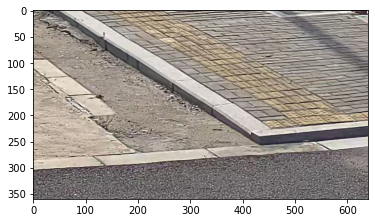

In [16]:
#展示第十五张图
plt.imshow(pic_list[9])
print(pic_list[9].shape)

In [9]:
from segment_anything import sam_model_registry, build_sam, SamPredictor ,SamAutomaticMaskGenerator

sam_checkpoint = "/disk2/zhanglingming/trashcls/SAM_test/checkpoint/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda:1"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(sam)

In [10]:
masks_list = []
for img in pic_list:
    masks_list.append(mask_generator.generate(img))

In [11]:
import numpy as np
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2], box[3]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

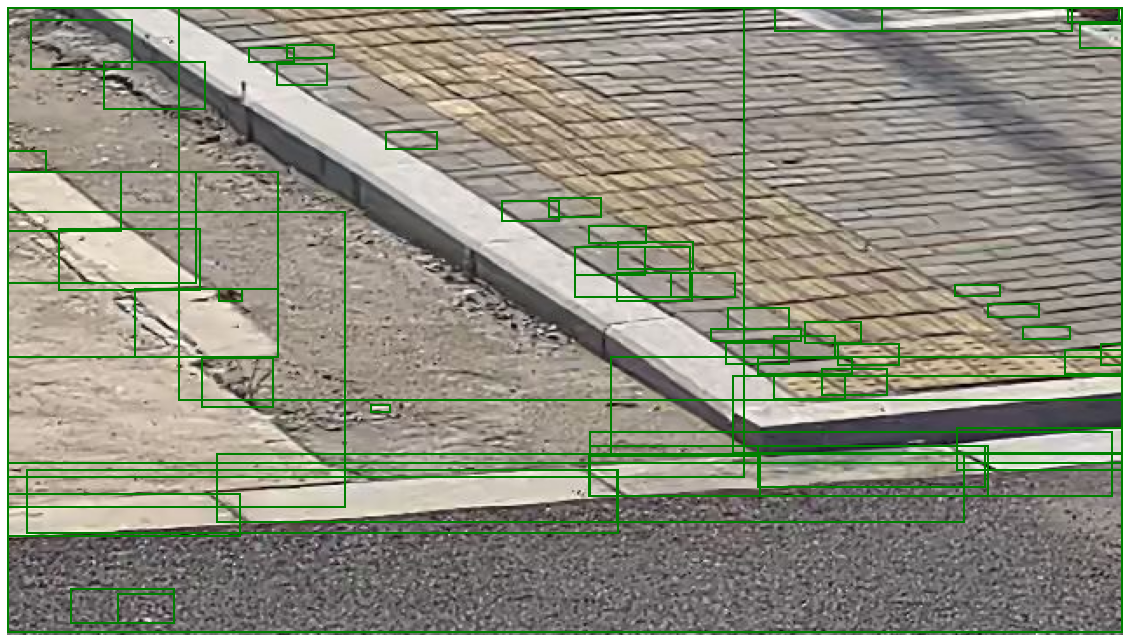

In [17]:
masks = masks_list[9]
image = pic_list[9]
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(image)
for mask in masks:
    # if mask['bbox'][0] == 0 or mask['bbox'][1] == 0:
    #     continue
    show_box(mask['bbox'], plt.gca())
plt.axis('off')
plt.show() 

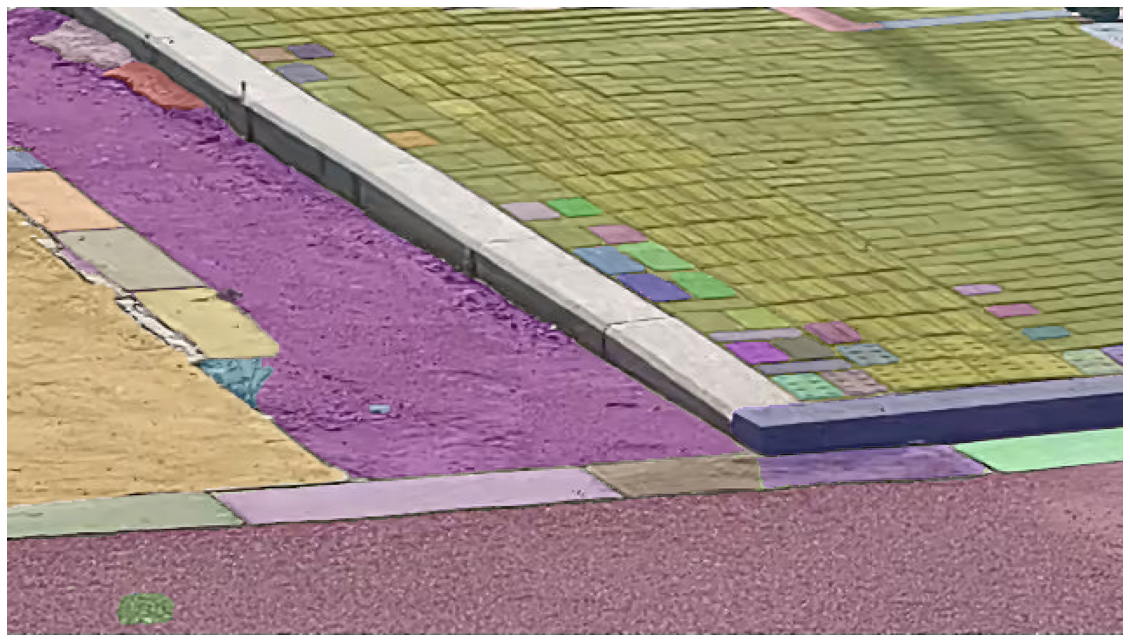

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 